![Medicaid Logo](https://www.medicaid.gov/themes/custom/medicaid/images/logo/medicaid_logo_green.svg)

# Overview
This comprehensive dataset allows for analyses that provide insights into drug utilization trends, cost distribution, and the comparison of Medicaid versus non-Medicaid reimbursement.

## Data Field Descriptions:

1. **Utilization Type**: Represents the type of service utilization, such as FFSU (Fee-for-Service Utilization) or MCOU (Managed Care Organization Utilization).

2. **State**: Indicates the state where the drug utilization data was recorded (e.g., CA for California).

3. **NDC (National Drug Code)**: A unique identifier for medications approved by the FDA, representing the drug’s manufacturer, product, and package size.

4. **Labeler Code**: A part of the NDC that identifies the company that manufactures or distributes the drug.

5. **Product Code**: Specifies the unique identifier for the drug product.

6. **Package Size**: Denotes the specific size or format of the drug package.

7. **Year**: The year in which the drug utilization data was recorded.

8. **Quarter**: The quarter of the year when the data was recorded (e.g., Q1, Q2).

9. **Suppression Used**: A boolean field indicating whether data suppression was applied for privacy or reporting compliance.

10. **Product Name**: The name of the drug.

11. **Units Reimbursed**: The total number of units of the drug that were reimbursed.

12. **Number of Prescriptions**: The total number of prescriptions filled for the specific drug.

13. **Total Amount Reimbursed**: The total dollar amount reimbursed for the drug.

14. **Medicaid Amount Reimbursed**: The portion of the total amount reimbursed by Medicaid.

15. **Non Medicaid Amount Reimbursed**: The portion of the total amount reimbursed by non-Medicaid sources, such as private insurance or out-of-pocket payments.

## Key Analyses

1. **Basic Data Exploration**: Inspecting data types, basic statistics, and missing values.
   
2. **Data Cleaning**: Handling missing values by filling numerical columns with zeros.
 
3. **Top Utilized Drugs**: Bar chart displaying the top 10 drugs by units reimbursed.
 
4. **Total Reimbursement Trends**: Line plot showing the total amount reimbursed by year and quarter.
 
5. **Medicaid vs. Non-Medicaid Reimbursement**: Comparison bar chart of total Medicaid and non-Medicaid reimbursement.
 
6. **Correlation Analysis**: Scatter plot showcasing the correlation between the number of prescriptions and total amount reimbursed
 
7. **Outlier Detection**: Combined boxplots and histograms for numerical columns to visualize outliers and data distribution.

8. **Utilization Type Analysis**: Bar charts showing total units and total amount reimbursed by utilization type (e.g., FFSU, MCOU).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
#plt.rcParams['axes.formatter.useoffset'] = False  # Disable scientific notation


In [2]:
# Load the dataset (replace 'file_path' with the actual path)
file_path = 'data/drug_utilization_data.csv'  # Replace with actual file path if needed
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Utilization Type,State,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Suppression Used,Product Name,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed
0,FFSU,CA,2021301,2,213,1,2024,2,False,HUMULIN R,1737.7,496.0,12010.39,12010.39,0.00
1,MCOU,CA,2021301,2,213,1,2024,2,False,HUMULIN R,80.6,221.0,11660.75,1012.33,10648.42
2,MCOU,CA,2120001,2,1200,1,2024,2,True,AMYVID,NaN,NaN,NaN,NaN,NaN
3,MCOU,CA,2143380,2,1433,80,2024,2,False,TRULICITY,413.0,204.0,205280.44,205280.44,0.00
4,FFSU,CA,2143380,2,1433,80,2024,2,False,TRULICITY,37718.0,15367.0,17921987.72,17735284.41,186703.31


In [3]:
# Basic Data Exploration
# Print basic statistics and data types
print("Data Types:\n", df.dtypes)
print("\nBasic Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Data Types:
 Utilization Type                   object
State                              object
NDC                                 int64
Labeler Code                        int64
Product Code                        int64
Package Size                        int64
Year                                int64
Quarter                             int64
Suppression Used                     bool
Product Name                       object
Units Reimbursed                  float64
Number of Prescriptions           float64
Total Amount Reimbursed           float64
Medicaid Amount Reimbursed        float64
Non Medicaid Amount Reimbursed    float64
dtype: object

Basic Statistics:
                 NDC  Labeler Code  Product Code  Package Size     Year  \
count  7.873900e+04  78739.000000  78739.000000  78739.000000  78739.0   
mean   4.008507e+10  40084.930314   1408.010541     22.236592   2024.0   
std    2.850263e+10  28502.749321   2225.167650     27.282568      0.0   
min    2.021301e+06      2.

In [4]:
# Data Cleaning (Handling missing values)
# Fill missing numerical values with 0
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(0)

# Verify that missing values are handled
print("\nMissing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 Utilization Type                  0
State                             0
NDC                               0
Labeler Code                      0
Product Code                      0
Package Size                      0
Year                              0
Quarter                           0
Suppression Used                  0
Product Name                      0
Units Reimbursed                  0
Number of Prescriptions           0
Total Amount Reimbursed           0
Medicaid Amount Reimbursed        0
Non Medicaid Amount Reimbursed    0
dtype: int64


# Analysis 1 - Top Utilized Drugs by Units Reimbursed & Total Amount Reimbursed


--- Top 10 Drugs by Units Reimbursement ---
  Product Name  Units Reimbursed
0   GAVILYTE -      1.792237e+08
1   SODIUM CHL      1.383910e+08
2   0.9% SODIU      1.079623e+08
3   IBUPROFEN       1.060318e+08
4   METFORMIN       8.979100e+07
5   AMOXICILLI      8.271944e+07
6   POLYETHYLE      8.090871e+07
7   PROMETHAZI      8.086087e+07
8   LACTATED R      6.679143e+07
9   GABAPENTIN      6.673490e+07


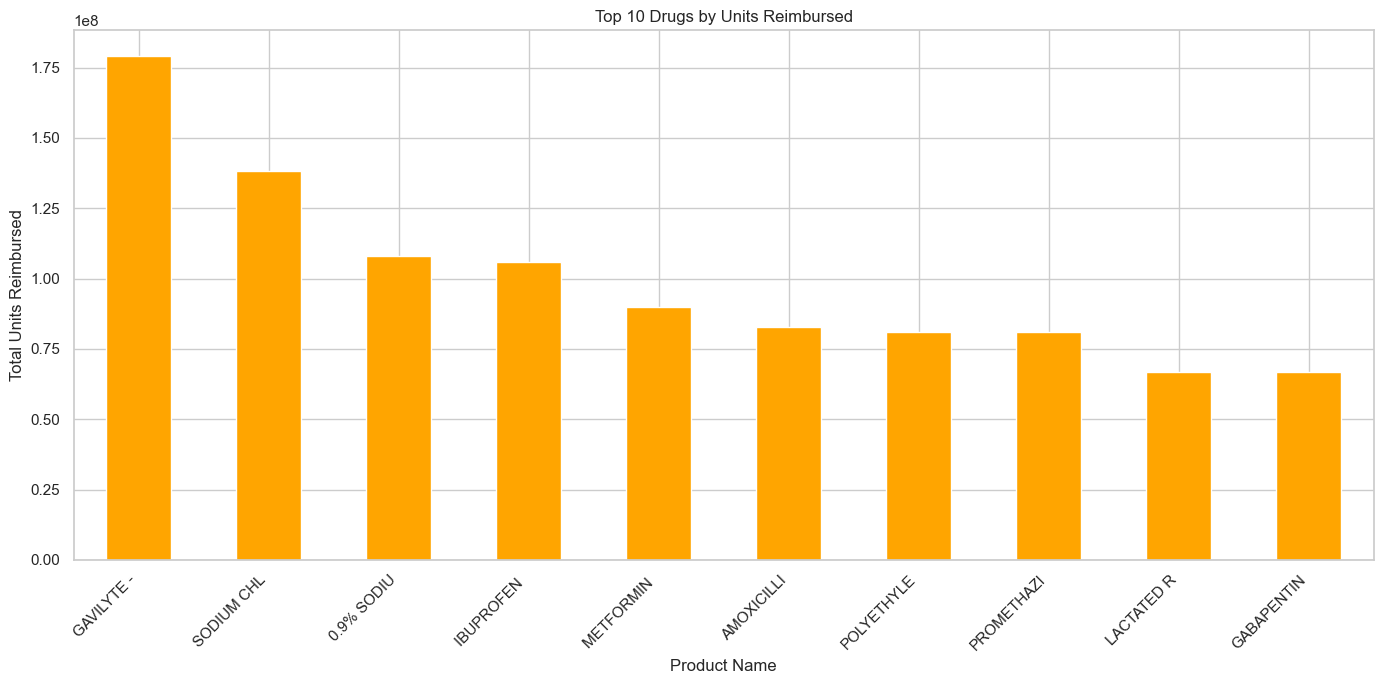

In [5]:
# Analysis 1 - Top Utilized Drugs by Units Reimbursed

# Generate top drugs by units reimbursed
if 'Product Name' in df.columns and 'Units Reimbursed' in df.columns:
    summary_table_units = (df.groupby('Product Name')
                        .agg({'Units Reimbursed': 'sum'})
                        .sort_values(by='Units Reimbursed', ascending=False)
                        .head(10))

    # Display the top 10 DataFrame with specific columns
    top_10_units_df = summary_table_units.reset_index()[['Product Name', 'Units Reimbursed']]
    print("\n--- Top 10 Drugs by Units Reimbursement ---")
    print(top_10_units_df)

    # Plot top drugs by units reimbursed
    plt.figure(figsize=(14, 7))
    top_10_units_df.set_index('Product Name')['Units Reimbursed'].plot(kind='bar', color='orange')
    plt.title('Top 10 Drugs by Units Reimbursed')
    plt.xlabel('Product Name')
    plt.ylabel('Total Units Reimbursed')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Saving a plot to the images folder
    plt.savefig('images/top_10_drugs_by_unit.png')
    plt.show()
else:
    print("Required columns for generating summary table are missing.")



--- Top 10 Drugs by Total Reimbursement ---
  Product Name  Total Amount Reimbursed
0   JARDIANCE              2.153301e+08
1   BIKTARVY               2.107466e+08
2   OZEMPIC 0.             1.793552e+08
3   HUMIRA PEN             1.698796e+08
4   OZEMPIC 1M             1.291643e+08
5   INVEGA SUS             1.279187e+08
6   SKYRIZI 15             1.021031e+08
7   TRULICITY              9.864918e+07
8   OZEMPIC 2M             8.686187e+07
9   COSENTYX S             8.383295e+07


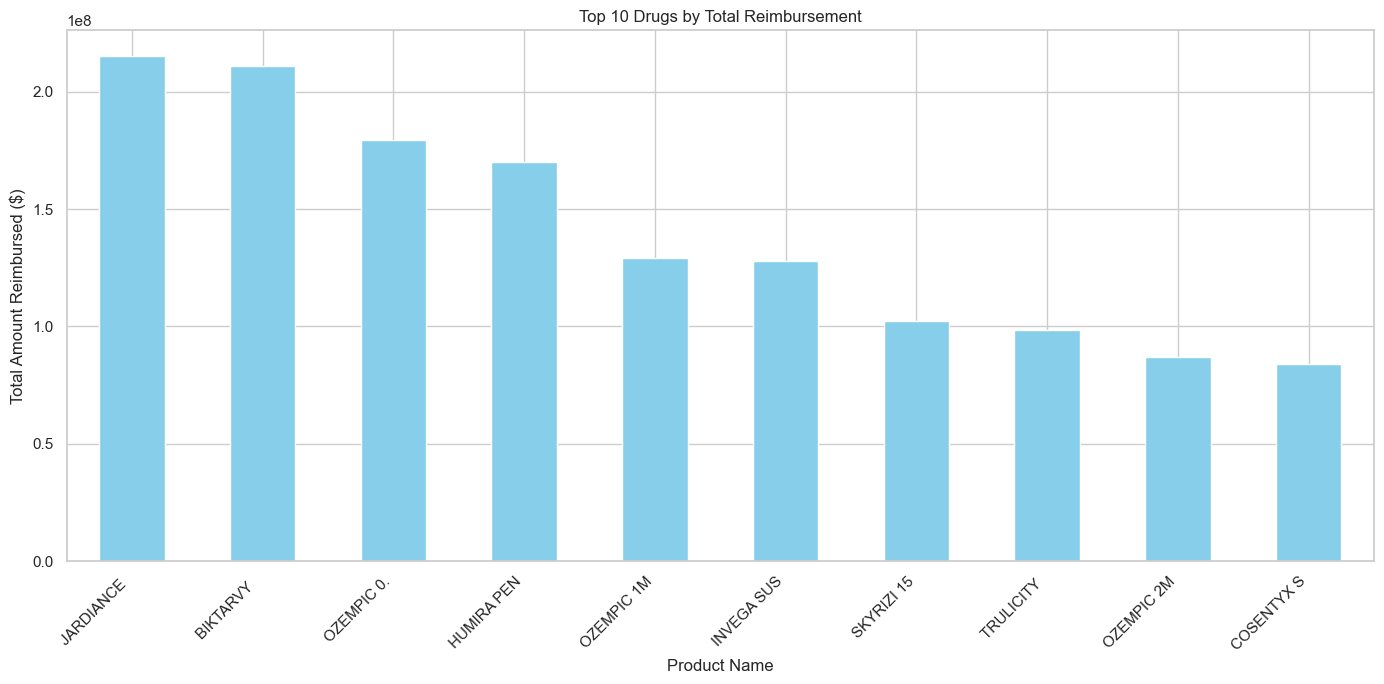

In [6]:
# Generate top drugs by total reimbursement
if 'Product Name' in df.columns and 'Total Amount Reimbursed' in df.columns:
    summary_table = (df.groupby('Product Name')
                    .agg({'Total Amount Reimbursed': 'sum'})
                    .sort_values(by='Total Amount Reimbursed', ascending=False)
                    .head(10))

    # Display the top 10 DataFrame with specific columns
    top_10_df = summary_table.reset_index()[['Product Name', 'Total Amount Reimbursed']]
    print("\n--- Top 10 Drugs by Total Reimbursement ---")
    print(top_10_df)

    # Display bar chart for top 10 drugs by total reimbursement
    plt.figure(figsize=(14, 7))
    summary_table['Total Amount Reimbursed'].plot(kind='bar', color='skyblue')
    plt.title('Top 10 Drugs by Total Reimbursement')
    plt.xlabel('Product Name')
    plt.ylabel('Total Amount Reimbursed ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for generating summary table are missing.")



# Analysis 2 - Total Amount Reimbursed by Year and Quarter

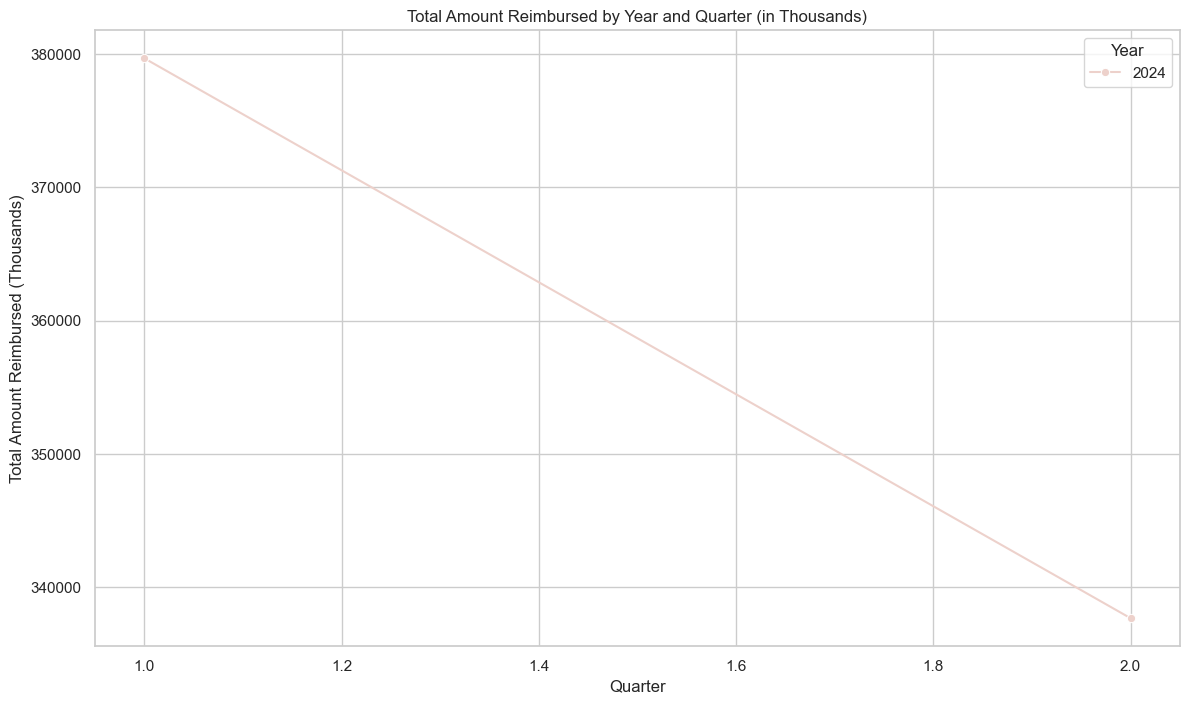

In [7]:
# Analysis 2 - Total Amount Reimbursed by Year and Quarter
# Group by Year and Quarter
reimbursement_trends = df.groupby(['Year', 'Quarter'])['Total Amount Reimbursed'].sum().reset_index()
reimbursement_trends['Total Amount Reimbursed'] /= 10000  # Scale to thousands

# Plot total reimbursement trends
plt.figure()
sns.lineplot(data=reimbursement_trends, x='Quarter', y='Total Amount Reimbursed', hue='Year', marker='o')
plt.title('Total Amount Reimbursed by Year and Quarter (in Thousands)')
plt.xlabel('Quarter')
plt.ylabel('Total Amount Reimbursed (Thousands)')

# Saving a plot to the images folder
plt.savefig('images/total_amount_reimbursed_by_year_quarter.png')

plt.show()



## Observation on Total Amount Reimbursed Line Plot by Year and Quarter
1. Timeframe: The data shown is for the year 2024, covering two quarters (Q1 and Q2)
   
2. Trend: There is a noticeable downward trend in the total amount reimbursed from Q1 to Q2. In Q1, the total amount reimbursed is approximately 380,000 (thousands), which decreases to around 340,000 (thousands) by Q2.
   
3. Gradient: The gradient between Q1 and Q2 is steep, suggesting a significant reduction in the total amount reimbursed over this short period.
   
4. Potential Reasons for the Downward Trend: 
   - Seasonal Variation: There could be a seasonal effect causing reduced drug reimbursements in Q2 compared to Q1.
   - Policy Changes: A change in healthcare policies, reimbursement caps, or drug coverage could contribute to the reduction.
   - Decreased Utilization: There may have been a drop in the number of prescriptions filled, leading to lower reimbursements.
   - Cost-Control Measures: Implementation of cost-saving strategies or stricter prescription guidelines could impact the overall amount reimbursed.
  
5. Further Analysis: This chart shows a significant drop in reimbursements between Q1 and Q2 of 2024, prompting a deeper dive into potential underlying causes.

# Analysis 3 - Medicaid vs. Non-Medicaid Amount Comparison

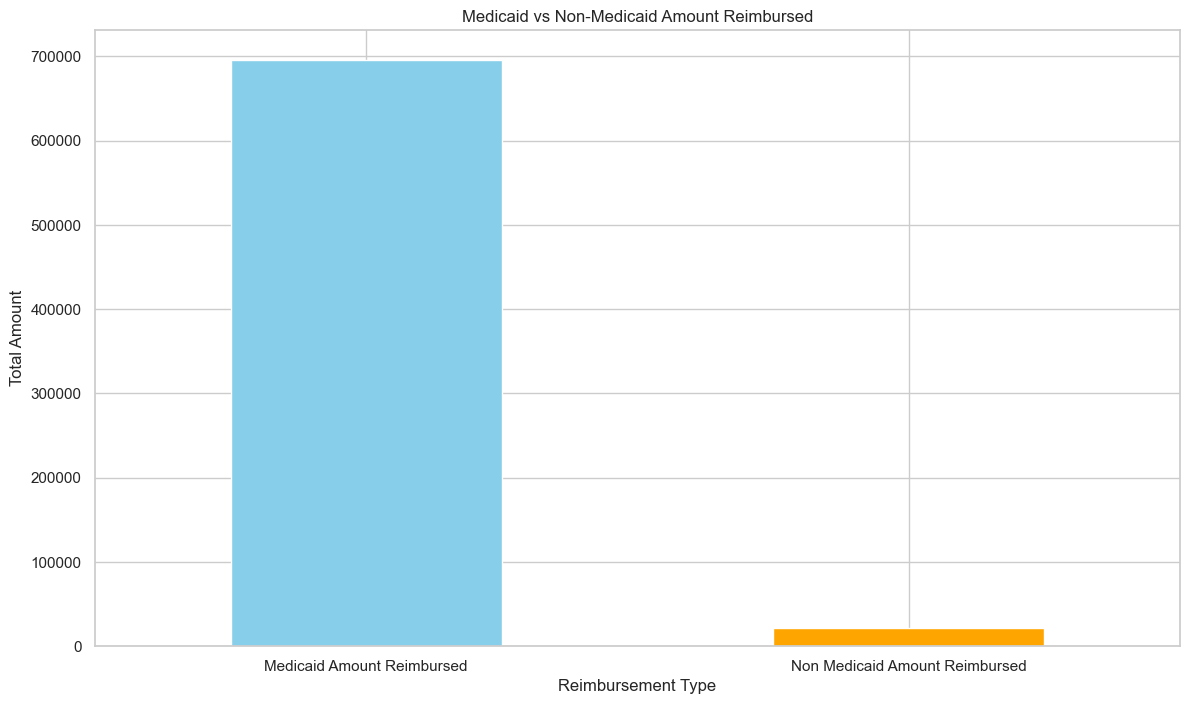

In [8]:
# Analysis 3 - Medicaid vs. Non-Medicaid Amount Comparison
# Sum of Medicaid and Non-Medicaid reimbursements
medicaid_comparison = df[['Medicaid Amount Reimbursed', 'Non Medicaid Amount Reimbursed']].sum() / 10000  # Scale to thousands

# Plot comparison of Medicaid vs Non-Medicaid amounts
plt.figure()
medicaid_comparison.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Medicaid vs Non-Medicaid Amount Reimbursed')
plt.xlabel('Reimbursement Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)

# Saving a plot to the images folder
plt.savefig('images/medicaid_vs_non-medicaid_reimbursement.png')

plt.show()




## Analysis
### This bar chart shows a comparison between the Medicaid Amount Reimbursed and Non-Medicaid Amount Reimbursed

1. Dominant Reimbursement Source: The Medicaid Amount Reimbursed is substantially higher than the Non-Medicaid Amount Reimbursed. The difference is stark, indicating that the majority of reimbursements in this dataset are funded through Medicaid.
   
2. Proportional Differences: The total amount reimbursed by Medicaid appears to be several orders of magnitude higher than that of non-Medicaid sources. This could suggest that most of the drug utilization in the dataset is covered by Medicaid programs rather than private insurance or out-of-pocket payments.
   
3. Scale and Magnitude: The y-axis shows the total reimbursement amounts. The height of the Medicaid Amount Reimbursed bar is close to 700,000, while the Non-Medicaid Amount Reimbursed is minimal in comparison, likely indicating less than 50,000 or a similar small value.

# Analysis 4 - Correlation Between Number of Prescriptions and Total Amount Reimbursed

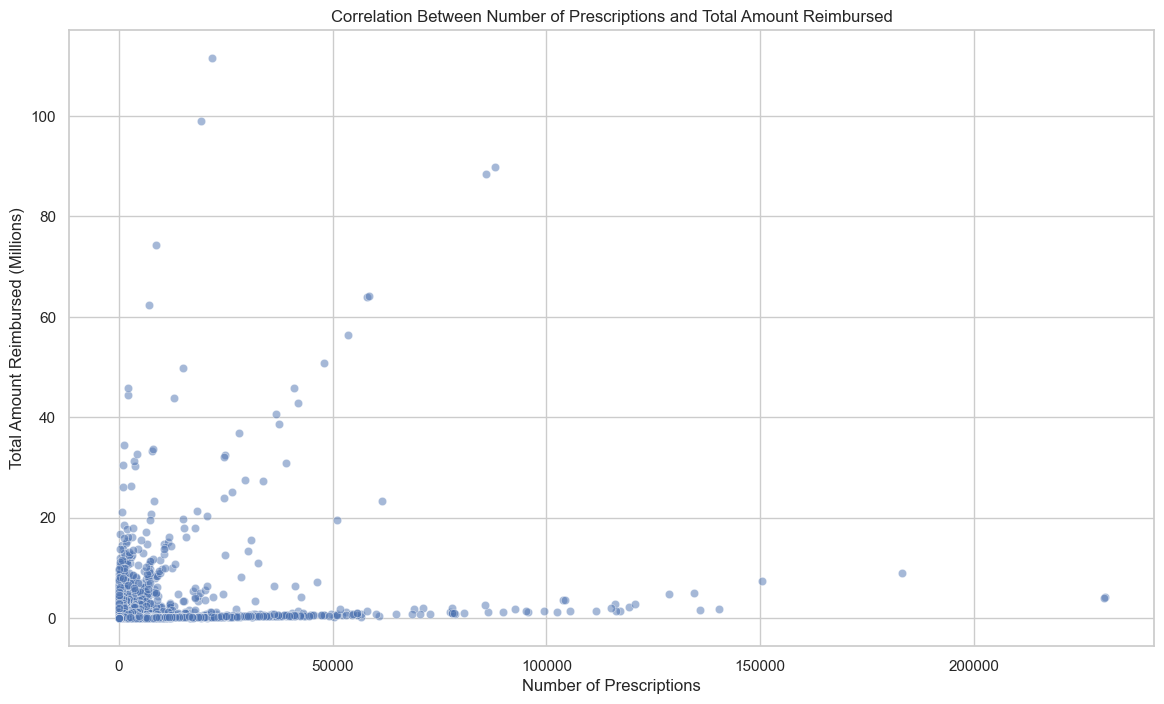

In [9]:
# Analysis 4 - Correlation Between Number of Prescriptions and Total Amount Reimbursed
# Scatter plot for correlation analysis
plt.figure()
sns.scatterplot(data=df, x='Number of Prescriptions', y=df['Total Amount Reimbursed'] / 1000000, alpha=0.5)
plt.title('Correlation Between Number of Prescriptions and Total Amount Reimbursed')
plt.xlabel('Number of Prescriptions')
plt.ylabel('Total Amount Reimbursed (Millions)')
plt.ticklabel_format(style='plain', axis='y')  # Ensure y-axis labels are plain

# Saving a plot to the images folder
plt.savefig('images/correlation_chart.png')

plt.show()




## Observations on Correlation Between Number of Prescriptions and Total Amount Reimbursed

1. General Trend: The scatter plot shows that while most data points are clustered around the lower end of the Number of Prescriptions and Total Amount Reimbursed, there are notable outliers where reimbursement amounts reach significantly high values, even with a relatively moderate number of prescriptions.
   
2. High Outliers: There is not a strong linear correlation visible between the number of prescriptions and the total amount reimbursed, suggesting that high reimbursement does not necessarily correspond to a higher number of prescriptions.
   
3. Distribution Observations: The bulk of the data falls within the lower-left region of the plot, showing that the majority of drugs have both a low number of prescriptions and a lower total reimbursement amount. The density of points decreases significantly as the Number of Prescriptions exceeds 50,000, suggesting fewer drugs are prescribed at such high volumes.

## Insights
1. There is not a strong linear correlation visible between the number of prescriptions and the total amount reimbursed, suggesting that high reimbursement does not necessarily correspond to a higher number of prescriptions.
   
2. This may imply that some drugs, although prescribed less frequently, are very costly and contribute significantly to the overall reimbursement total.

# Outlier Detection with Boxplots

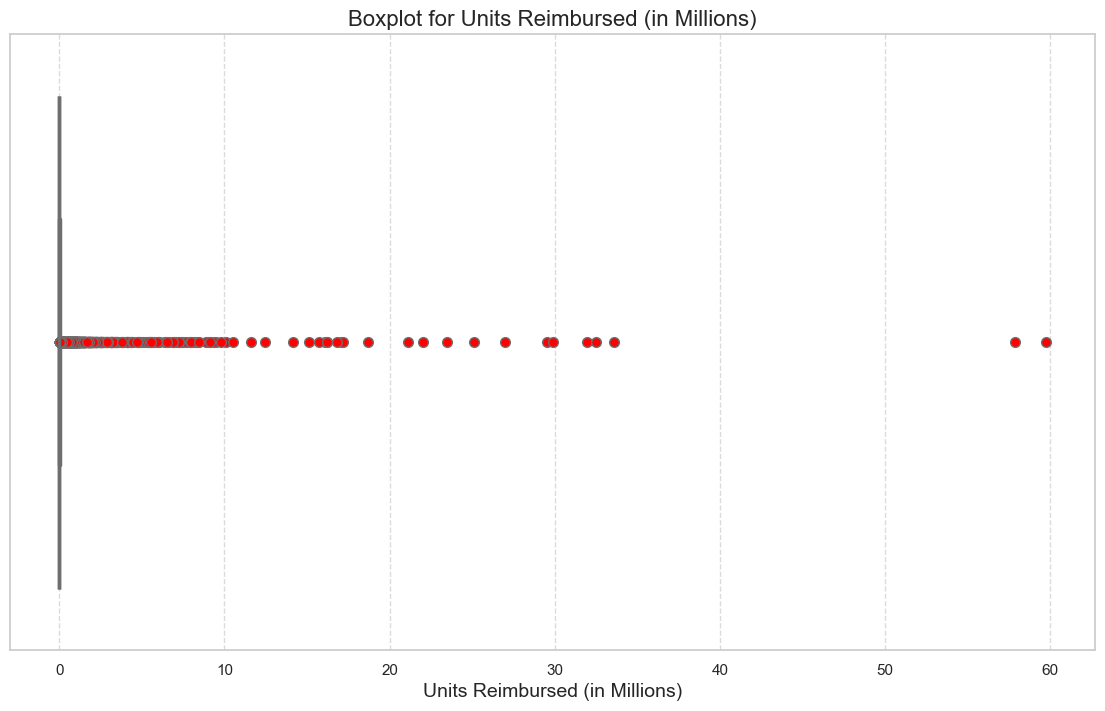

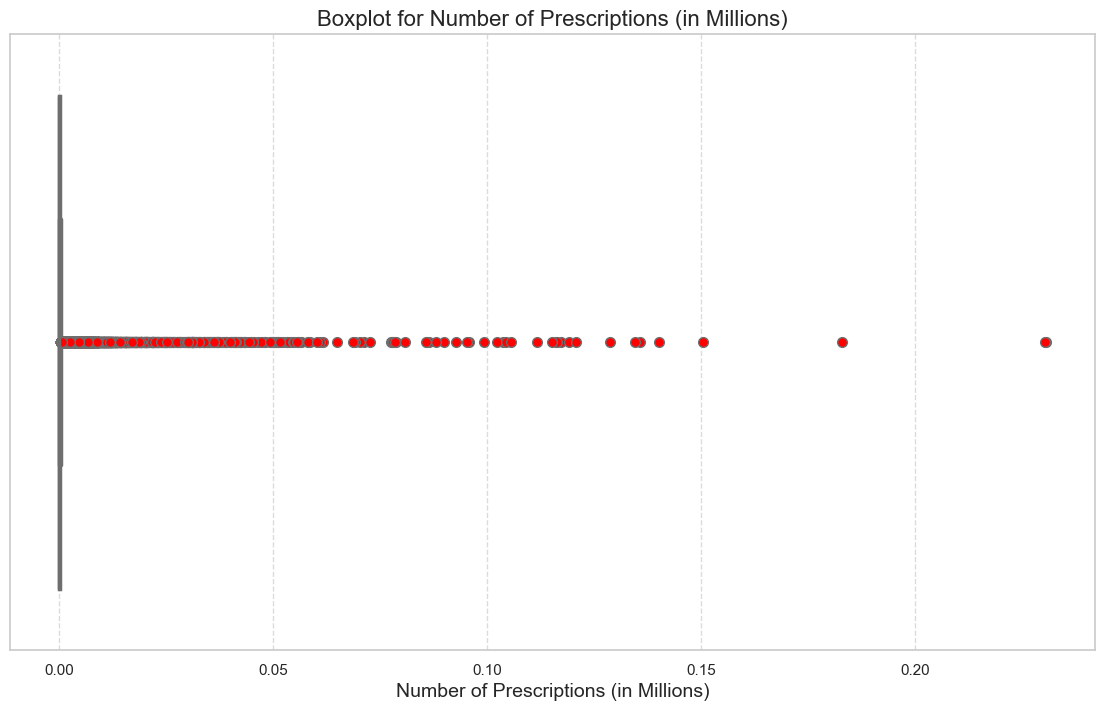

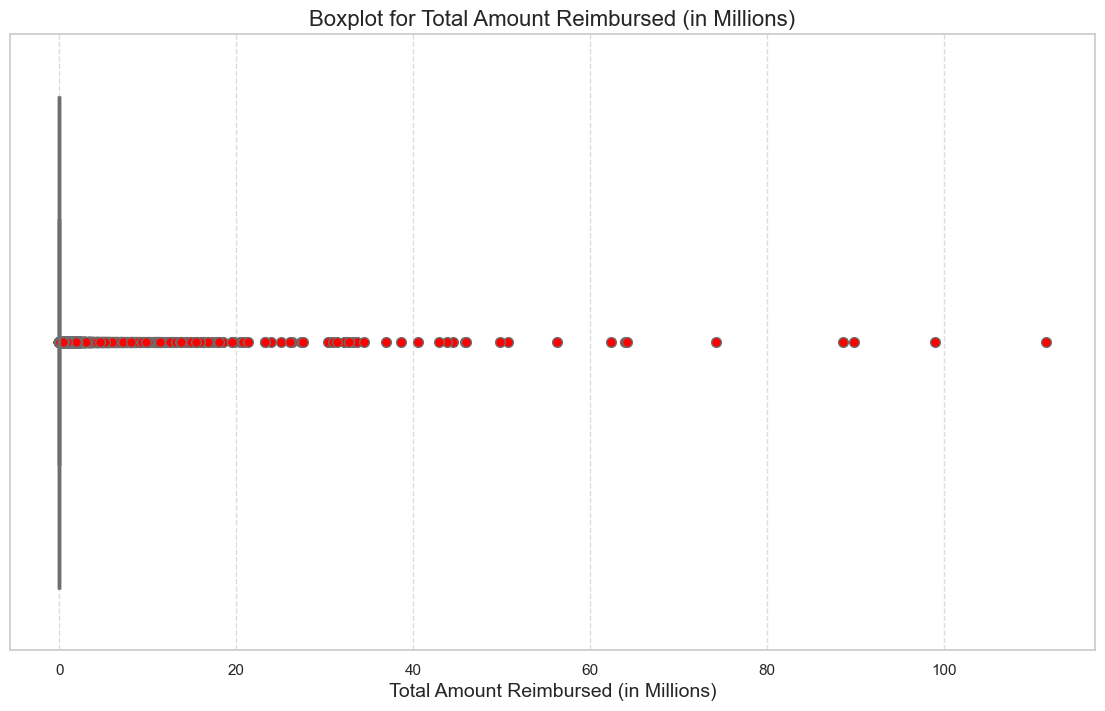

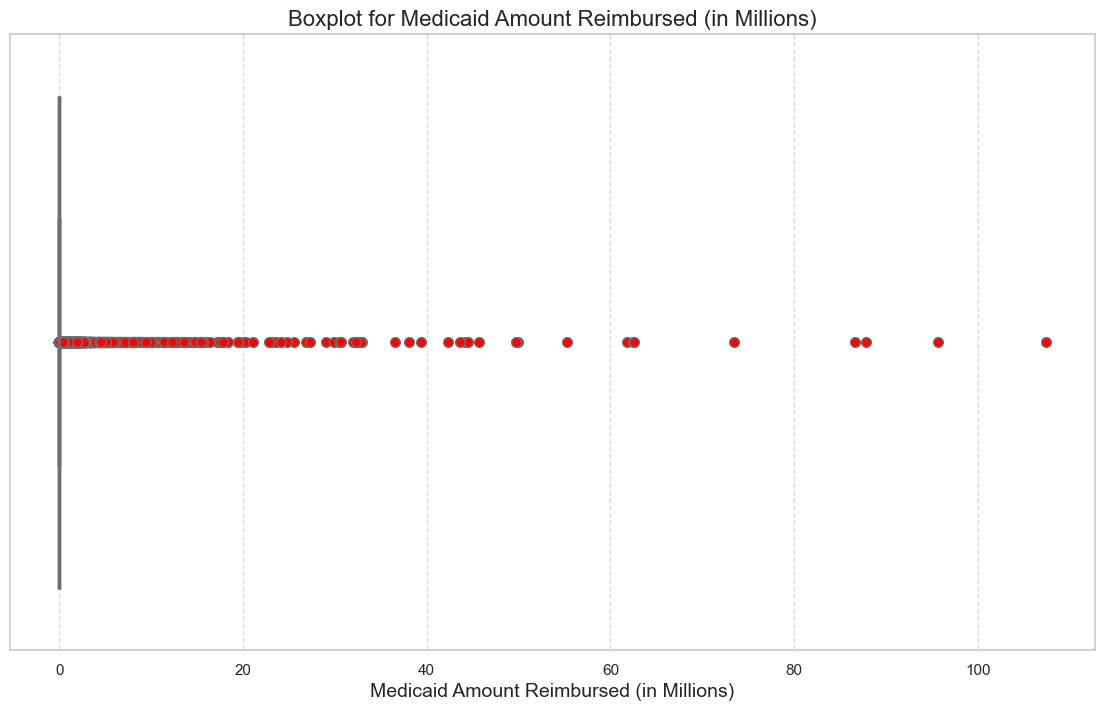

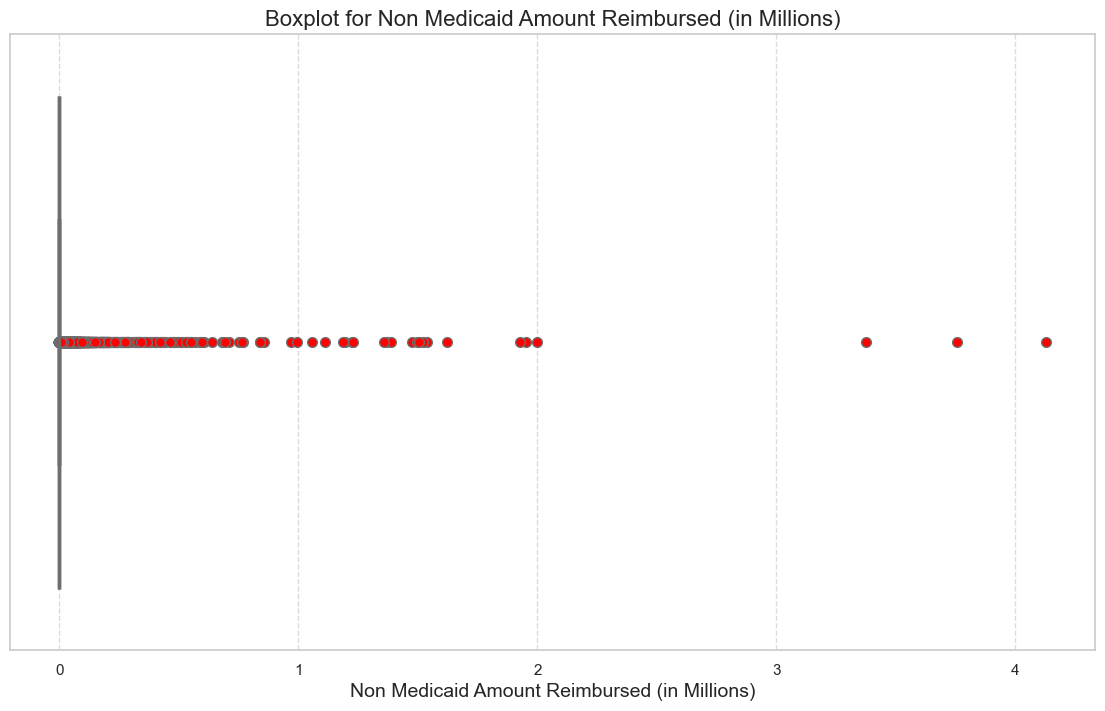

In [10]:
# Outlier Detection with Boxplots
# Convert numerical columns to millions
def convert_to_millions(df, cols):
    for col in cols:
        df[col] = df[col] / 1_000_000
    return df

# Update the DataFrame with units in millions
numerical_cols_to_check = ['Units Reimbursed', 'Number of Prescriptions', 'Total Amount Reimbursed', 'Medicaid Amount Reimbursed', 'Non Medicaid Amount Reimbursed']
df = convert_to_millions(df, numerical_cols_to_check)

# Plot boxplots for the updated DataFrame
for col in numerical_cols_to_check:
    plt.figure()
    sns.boxplot(x=df[col], color='lightcoral', linewidth=2.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 7, 'linestyle': 'none'})
    plt.title(f'Boxplot for {col} (in Millions)', fontsize=16)
    plt.xlabel(f'{col} (in Millions)', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Save the plot in the images folder with a descriptive filename
    plt.savefig(f'images/boxplot_{col.replace(" ", "_").lower()}.png')
    
    plt.show()



## Explanation of Outliers

1. **Possible Reasons:** 
   - High-Volume Prescriptions: Outliers could represent instances where certain drugs were reimbursed in large quantities due to high demand or specific cases involving bulk distribution.
   - Special Cases: Some outliers might be due to specific medical conditions that require expensive or high-volume drugs, leading to large reimbursements.
   - Errors or Anomalies: It is possible that data entry errors or anomalies contribute to some of these extreme values.

2. **Impact on Analysis:**
   -  The presence of many outliers indicates that the dataset may be skewed or have a long tail. This can affect statistical analyses, such as calculating the mean, which may be disproportionately influenced by these extreme values.
   -   If these outliers represent genuine data points (e.g., high-cost medications), they provide important insights into reimbursement trends and should be considered in further analyses.

# Analysis 5 - Drug Utilization Trends by Utilization Type

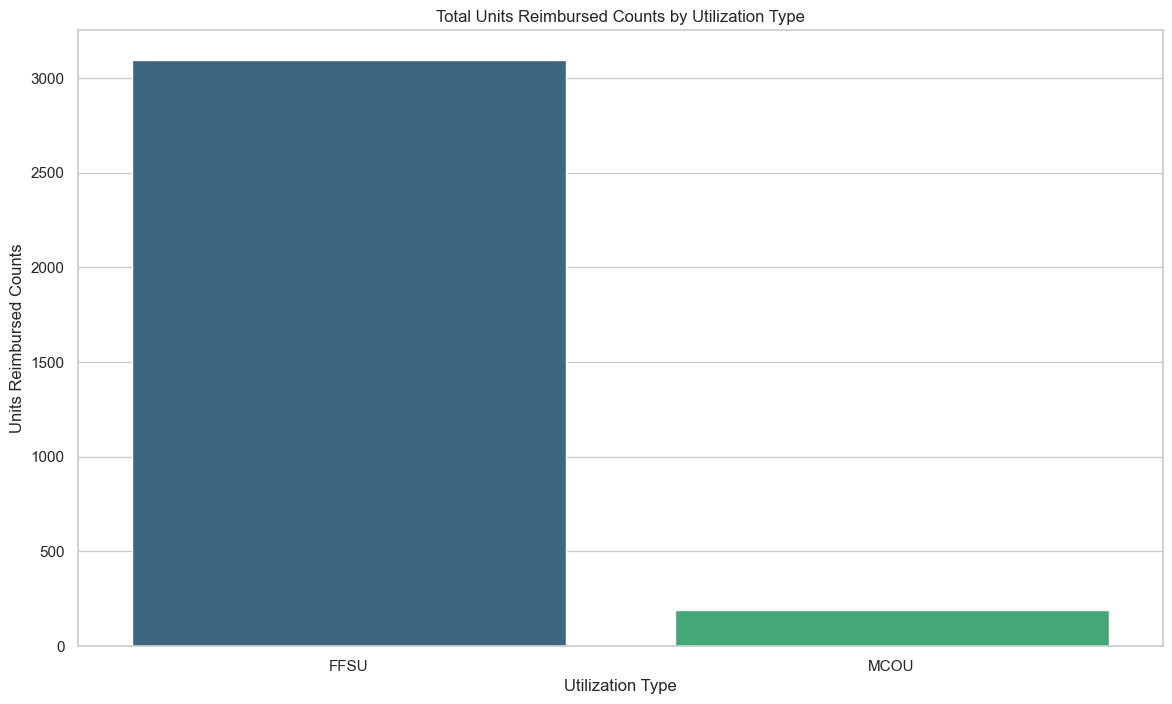

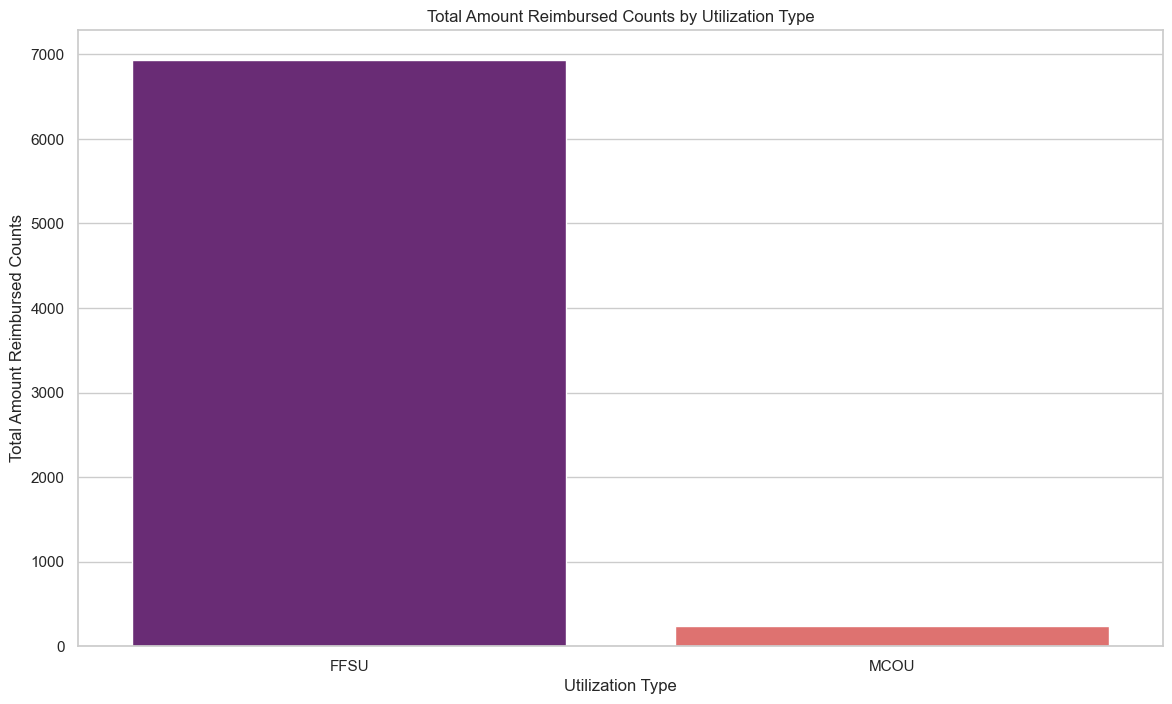

In [11]:
# Analysis 5 - Drug Utilization Trends by Utilization Type
# Group by Utilization Type and calculate total amounts and units
utilization_trends = df.groupby('Utilization Type')[['Units Reimbursed', 'Total Amount Reimbursed']].sum().reset_index()
utilization_trends['Units Reimbursed']   # Scale to thousands
utilization_trends['Total Amount Reimbursed']   # Scale to thousands

# Plot total units reimbursed by utilization type
plt.figure()
sns.barplot(data=utilization_trends, x='Utilization Type', y='Units Reimbursed', palette='viridis')
plt.title('Total Units Reimbursed Counts by Utilization Type')
plt.xlabel('Utilization Type')
plt.ylabel('Units Reimbursed Counts')

# Saving a plot to the images folder
plt.savefig('images/total_units_reimbursed.png')
plt.show()

# Plot total amount reimbursed by utilization type
plt.figure()
sns.barplot(data=utilization_trends, x='Utilization Type', y='Total Amount Reimbursed', palette='magma')
plt.title('Total Amount Reimbursed Counts by Utilization Type')
plt.xlabel('Utilization Type')
plt.ylabel('Total Amount Reimbursed Counts')

# Saving a plot to the images folder
plt.savefig('images/total_amount_reimbursed.png')
plt.show()


## Observations on Total Units and Total Amount Reimbursed by Utilization Type

1. FFSU vs. MCOU: The large discrepancy between FFSU and MCOU suggests that Fee-for-Service is the predominant mode of drug utilization and reimbursement. This could indicate that individuals or systems using FFSU incur more prescriptions or utilize more costly drugs compared to managed care.
   
2. Policy and Budget Impact: Understanding this distribution can help policymakers and healthcare administrators assess where most drug-related reimbursements are happening and consider if adjustments are needed in the structure or incentives for different service types

In [12]:
# Save the Cleaned and Analyzed Data
# Save the processed DataFrame to a new CSV file
df.to_csv('data/processed_drug_utilization_data.csv', index=False)
print("Processed data saved successfully!")

Processed data saved successfully!
